In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder,LabelBinarizer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score,precision_recall_fscore_support,f1_score
from sklearn.metrics import classification_report
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
from pandas.tools.plotting import parallel_coordinates
from math import pi

In [2]:
wine_base = pd.read_csv("Our_dataset/StemmedWord2vecTop3_parsed.csv", index_col=0) 
wine_base = wine_base.reset_index()
wine_base= wine_base[pd.notnull(wine_base['description'])]
wine_base.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'taster_name', 'title', 'variety', 'winery',
       'similarityTop3WinesByVariety', 'word_count', 'tf_grouped_1',
       'tf_grouped_2', 'tf_grouped_3', 'tfIdf_grouped_1', 'tfIdf_grouped_2',
       'tfIdf_grouped_3', 'tf_fullData_1', 'tf_fullData_2', 'tf_fullData_3',
       'tfIdf_fullData_1', 'tfIdf_fullData_2', 'tfIdf_fullData_3'],
      dtype='object')

In [3]:
for col in wine_base.columns:
    if(col.startswith("tf")):
            wine_base.drop(col,inplace=True,axis=1)

In [4]:
import re
def get_vintage(df):
    pattern = r"\d{4}"
    vintages = []
    for elem in df.title:
        match = re.findall(pattern,elem)
        year = 0
        if len(match)>1:
            y= int(match[0])
            if y <1952:
                year = 0
            elif y==3000:
                year == 2009
            elif y == 7200:
                year = int(match[1])
            else:
                year= y
        elif len(match)==1:
            y= int(match[0])
            if y <1952:
                year = 0
            elif y==3000:
                year == 2009
            elif year == 7200:
                year = 0
            else:
                year = y
        else:
            year = 0
        vintages.append(year)

    se = pd.Series(vintages)
    df['vintage']=se.values 
    df.drop('title',axis=1)
    return df

wine_base = get_vintage(wine_base)
#drop reviwe of wine with ventage =0
wine_base = wine_base[wine_base.vintage != 0]

In [5]:
wine_base

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,similarityTop3WinesByVariety,word_count,vintage
0,Italy,tropic broom brimston herb express appl citru ...,Vulkà Bianco,87,17.000000,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,1.142944,10,2013
1,Portugal,fruiti firm juici red berri drinkabl,Avidagos,87,15.000000,Douro,unknown,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1.078157,6,2011
2,US,tart snappi lime flesh domin green pineappl po...,unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,1.156945,10,2013
3,US,pineappl rind lemon pith orang blossom opul no...,Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,1.025862,13,2013
4,US,much regular bottl rough tannic rustic earthi ...,Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,1.192760,16,2012
5,Spain,blackberri typic navarran whiff green herb cas...,Ars In Vitro,87,15.000000,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,0.648527,17,2011
6,Italy,bright inform candi berri white pepper savori ...,Belsito,87,16.000000,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,0.963839,10,2013
7,France,dri restrain offer profus firm textur much food,unknown,87,24.000000,Alsace,Alsace,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,1.094184,8,2012
8,Germany,savori thyme note accent preserv peach brisk o...,Shine,87,12.000000,Rheinhessen,unknown,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,1.050787,12,2013
9,France,great depth fresh appl pear touch spice dri cr...,Les Natures,87,27.000000,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,1.043785,11,2012


In [6]:
wine_base = wine_base[pd.notnull(wine_base['country'])]
wine_base = wine_base[pd.notnull(wine_base['taster_name'])]
wine_base = wine_base[pd.notnull(wine_base["variety"])]
wine_base = wine_base[pd.notnull(wine_base["province"])]
wine_base = wine_base[pd.notnull(wine_base["winery"])]

wine_base.drop("title",inplace=True,axis=1)
wine_base = wine_base.dropna()

#keep track of the countries,provinces,taster_names in the database
countries = wine_base["country"].unique().tolist()
provinces = wine_base["province"].unique().tolist()
tasters = wine_base["taster_name"].unique().tolist()

def OneHotEncode(dataframe,column_to_encode,take_whole_dataset=True):
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(dataframe[[column_to_encode]])
    mapping = {}
    i=0
    for elem in enc.categories_[0]:
        mapping[elem]=i
        i+=1
    resu = enc.transform(dataframe[[column_to_encode]]).toarray()
    if take_whole_dataset:
        for elem in mapping:
            dataframe[elem]=resu[:,mapping[elem]]
        return dataframe
    else:
        subset = dataframe[[column_to_encode]]
        for elem in mapping:
            subset[elem]=resu[:,mapping[elem]]
        return subset

In [7]:
wine_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113297 entries, 0 to 117651
Data columns (total 13 columns):
country                         113297 non-null object
description                     113297 non-null object
designation                     113297 non-null object
points                          113297 non-null int64
price                           113297 non-null float64
province                        113297 non-null object
region_1                        113297 non-null object
taster_name                     113297 non-null object
variety                         113297 non-null object
winery                          113297 non-null object
similarityTop3WinesByVariety    113297 non-null float64
word_count                      113297 non-null int64
vintage                         113297 non-null int64
dtypes: float64(2), int64(3), object(8)
memory usage: 12.1+ MB


In [8]:
wine_base = OneHotEncode(wine_base,'taster_name')
wine_base = wine_base.drop('taster_name', 1)
wine_base = OneHotEncode(wine_base,'province')
wine_base = wine_base.drop('province', 1)


In [9]:
wine_base.drop(["designation","description"],axis=1,inplace=True)


In [10]:
lb = LabelBinarizer()

wine_base["winery"] = wine_base["winery"].astype('category').cat.codes
wine_base["region_1"] = wine_base["region_1"].astype('category').cat.codes
wine_base["variety"] = wine_base["variety"].astype('category').cat.codes


In [11]:
wine_base

,country,points,price,region_1,variety,winery,similarityTop3WinesByVariety,word_count,vintage,Alexander Peartree,...,Washington-Oregon,Weinland Österreich,Weinviertel,Wellington,Western Australia,Western Cape,Wiener Gemischter Satz,Württemberg,Österreichischer Perlwein,Österreichischer Sekt
0,Italy,87,17.000000,419,597,10992,1.142944,10,2013,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Portugal,87,15.000000,1207,385,12258,1.078157,6,2011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,US,87,14.000000,1195,373,12319,1.156945,10,2013,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,US,87,13.000000,541,409,13618,1.025862,13,2013,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,US,87,65.000000,1195,377,13831,1.192760,16,2012,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Spain,87,15.000000,743,508,13910,0.648527,17,2011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Italy,87,16.000000,1182,163,14206,0.963839,10,2013,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,France,87,24.000000,21,185,14564,1.094184,8,2012,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Germany,87,12.000000,1207,185,8007,1.050787,12,2013,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,France,87,27.000000,21,373,8547,1.043785,11,2012,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


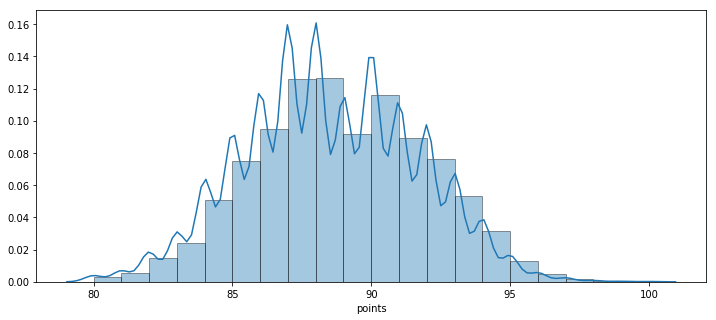

In [12]:
fig, ax = plt.subplots(figsize = (12, 5))
sns.distplot(wine_base["points"],hist=True,bins = 20,hist_kws={'edgecolor':'black'})

wine2 = pd.DataFrame()
wine2 = wine_base
nbins  = 3
labels=["low","medium","high"]
g,b = pd.qcut(wine2["points"],nbins,labels=labels,retbins=True)   #uses quartiles and statistic stuff
g.tolist()
wine2["category"] = g

wine2.drop("description",axis=1,inplace=True)

parallel coordinates would be nice

low = wine2[wine2["category"] == "low"]
medium = wine2[wine2["category"] == "medium"]
high = wine2[wine2["category"] == "high"]

wine3 = pd.DataFrame()
features = ["category",'vintage', 'country', 'points', 'price', 'province','region_1', 'taster_name', 'variety', 'winery','similarityTop3WinesByVariety', 'word_count']
for feat in features:
    wine3[feat] = wine2[feat]
fig, ax = plt.subplots(figsize = (25, 10))
parallel_coordinates(wine3, 'category', colormap=plt.get_cmap("Set2"))
plt.show()

# DEFINE NUMBER OF BINS = classes to be predicted (must be executed so that Y is the same for every execution)

In [13]:
Y = wine_base['points'].copy()
#DECIDE NUMBER OF BINS 
#nbins  = 4
#labels=["low","medium","high","very_high"]
#nbins = 5
#labels=["very_low", "low", "medium","high","very_high"]
#bin identici 
#Y,bins = pd.cut(Y,nbins,labels=labels,retbins=True,include_lowest=True,right=True)
#quartile
nbins  = 3
labels=["low","medium","high"]
Y,bins = pd.qcut(Y,nbins,labels=labels,retbins=True)   #uses quartiles and statistic stuff
values = Y.tolist()  
bins

array([ 80.,  87.,  90., 100.])

10.0


<module 'seaborn' from 'E:\\Anaconda\\lib\\site-packages\\seaborn\\__init__.py'>

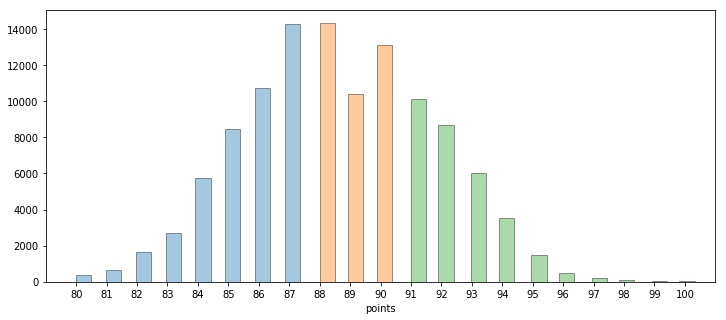

In [14]:
#plot the binning result
fig, ax = plt.subplots(figsize = (12, 5))
for i in range(1,len(bins)-1):

    if i == 1:
        a = wine_base[wine_base["points"] <= bins[i]]
        n =  bins[i]-80
        sns.distplot(a["points"],hist_kws={"width": 0.5,'edgecolor':'black'},kde=False)
        g =+n
    if i == len(bins)-1:
        a = wine_base[wine_base["points"] > bins[i]]
        n = 100 - bins[i]
        sns.distplot(a["points"],hist_kws={"width": 0.5,'edgecolor':'black'},kde=False)
        g =+ n
    else:
        n = bins[i+1] - bins[i]
        g =+n
        a = wine_base[(wine_base["points"] > bins[i]) & (wine_base["points"] <= bins[i+1])]
        sns.distplot(a["points"],hist_kws={"width": 0.5,'edgecolor':'black'},kde=False)
ax.set(xticks=wine_base["points"].unique())
print(g)
sns

In [ ]:
basic = ["price",'vintage', 'country', 'province', 'region_1', 'taster_name', 'variety','winery']
word = ["word_count"]
#tfGroup = ['tf_grouped_1','tf_grouped_2', 'tf_grouped_3']
#tfIdfGroup = ['tfIdf_grouped_1', 'tfIdf_grouped_2', 'tfIdf_grouped_3']
#tfFull = ['tf_fullData_1', 'tf_fullData_2', 'tf_fullData_3',]
#tfIdfFull = ['tfIdf_fullData_1', 'tfIdf_fullData_2', 'tfIdf_fullData_3']
#weather = ['pr_5', 'pr_6', 'pr_7', 'pr_8', 'pr_9', 'tas_5', 'tas_6', 'tas_7', 'tas_8', 'tas_9']# don't really care bcs 0 improvements
word2vec = ['similarityTop3WinesByVariety']
features = basic + word + word2vec

# test stuff based on countries

In [15]:
countries = wine_base["country"].unique().tolist()
countries

['Italy',
 'Portugal',
 'US',
 'Spain',
 'France',
 'Germany',
 'Argentina',
 'Chile',
 'Australia',
 'Austria',
 'South Africa',
 'New Zealand']

In [16]:
for c in countries:
    print(c,len(wine_base[wine_base["country"] == c]))

Italy 16965
Portugal 4950
US 49529
Spain 5637
France 18906
Germany 1978
Argentina 3495
Chile 4159
Australia 2130
Austria 2996
South Africa 1284
New Zealand 1268


In [17]:
test = wine_base["country"].unique().tolist()
test

['Italy',
 'Portugal',
 'US',
 'Spain',
 'France',
 'Germany',
 'Argentina',
 'Chile',
 'Australia',
 'Austria',
 'South Africa',
 'New Zealand']

In [18]:
def testByCountry(data,countries):
    #for every country, use it as test set
    nbins  = 3
    labels=["low","medium","high"]
    wine2 = pd.DataFrame()
    wine2 = data
    g,b = pd.qcut(data["points"],nbins,labels=labels,retbins=True)   #uses quartiles and statistic stuff
    g.tolist()
    wine3 = wine2.drop(["points"],axis=1)
    wine3["category"] = g
    df = pd.DataFrame()
    for el in countries:
        res = applyTest(wine3,el)
        df = df.append(res)
    return df

def applyTest(data,objCountry):
  
    #set many different combinations
    #only on these
    allfeatures = []
    args = []
    for el in wine_base.columns:
        if el != "description":
            allfeatures.append(el)   
        if el != "description" and el != "points" and el != "country":
            args.append(el)
    combos = {"depth":[2,3,4,5,6],"args":[args]}
    #
    res = buildCountryResult(data,args,allfeatures,combos,objCountry)
    return res

def buildCountryResult(data,args,allfeatures,combination,objCountry):
    cols = ["algorithm","ObjectiveCountry","input","precision","accuracy","f1","depth"]
    algorithm = "decTree"
    for lab in labels:
        cols.append(lab +"_prec")
        cols.append(lab +"_recall")
        cols.append(lab +"_f1")
        cols.append(lab +"_support")
    for el in args: #controlla che allfeats vada bene
        c = "feat_"+el
        if c not in cols:
            cols.append(c)
    results = pd.DataFrame()
    comb = 0
    row = 0
    for el in combination["args"]: 
        el = el + ["country","category"]
        X = data[el]
        #create test and training sets
        X_train = X[X["country"] != objCountry]
        y_train = pd.DataFrame()
        y_train = list(X_train["category"])
        print(objCountry +" must not be in training set " + str(X_train["country"].unique().tolist()))
        X_train.drop(["country","category"],axis=1,inplace=True)

        X_test = X[X["country"] == objCountry]
        y_test = X_test["category"]
        X_test.drop(["country","category"],axis=1,inplace=True)
        for depth in combination["depth"]:
                row = row + 1  
                #train stuff
                classifier = DecisionTreeClassifier(max_depth=depth)
                classifier.fit(X_train,y_train)
                y_pred = classifier.predict(X_test)  
                acc = accuracy_score(y_test,y_pred)#average="macro")
                weightedPrec = precision_score(y_test,y_pred,average="weighted")
                f1 = f1_score(y_test,y_pred,average="weighted")
                rowData = [algorithm,objCountry,el,weightedPrec,acc,f1,depth]
                precision,recall,fscore,support = precision_recall_fscore_support(y_test, y_pred)
                for i in range(0,len(labels)):
                    rowData.append(precision[i])
                    rowData.append(recall[i])
                    rowData.append(fscore[i])
                    rowData.append(support[i])
                    temp = {}
                c = zip(el,classifier.feature_importances_)
                names = []
                for name,importance in c:
                    temp[name] = importance
                    names.append(name)
                for feat in names:
                    #if feat not in allfeatures:
                     #   rowData.append(100) #100 is an impossible value not to be taken into account
                    #else:
                        rowData.append(temp[feat]) #qualcosa non quadra con le liste di input e colonne per appendere i dataframe con le relative feature importances
                df2 = pd.DataFrame([rowData],columns=cols)
                results = results.append(df2,ignore_index=True)
        comb = comb + 1
    return results

In [19]:
basic = ["price",'vintage', 'province', 'region_1', 'taster_name', 'variety','winery'] #country non deve esserci 
word = ["word_count"]
word2vec = ['similarityTop3WinesByVariety']
features = []
for el in wine_base.columns:
    if el != "description":
        features.append(el)

result = testByCountry(wine_base,countries)

Italy must not be in training set ['Portugal', 'US', 'Spain', 'France', 'Germany', 'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa', 'New Zealand']
Portugal must not be in training set ['Italy', 'US', 'Spain', 'France', 'Germany', 'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa', 'New Zealand']
US must not be in training set ['Italy', 'Portugal', 'Spain', 'France', 'Germany', 'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa', 'New Zealand']
Spain must not be in training set ['Italy', 'Portugal', 'US', 'France', 'Germany', 'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa', 'New Zealand']
France must not be in training set ['Italy', 'Portugal', 'US', 'Spain', 'Germany', 'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa', 'New Zealand']
Germany must not be in training set ['Italy', 'Portugal', 'US', 'Spain', 'France', 'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa', 'New Zealand']
Argentina must not be in training set ['

In [20]:
len(result.columns.tolist())

287

In [21]:
result.drop("input",inplace=True,axis=1)

In [22]:
result

,algorithm,ObjectiveCountry,precision,accuracy,f1,depth,low_prec,low_recall,low_f1,low_support,...,feat_Washington-Oregon,feat_Weinland Österreich,feat_Weinviertel,feat_Wellington,feat_Western Australia,feat_Western Cape,feat_Wiener Gemischter Satz,feat_Württemberg,feat_Österreichischer Perlwein,feat_Österreichischer Sekt
0,decTree,Italy,0.540875,0.551253,0.534641,2,0.536900,0.653280,0.589400,4009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,decTree,Italy,0.558822,0.532449,0.518109,3,0.452237,0.879771,0.597392,4009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,decTree,Italy,0.593272,0.565871,0.563017,4,0.516491,0.792966,0.625541,4009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,decTree,Italy,0.586953,0.573946,0.569871,5,0.516485,0.793215,0.625615,4009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,decTree,Italy,0.581607,0.556027,0.550885,6,0.477010,0.822898,0.603936,4009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000470
0,decTree,Portugal,0.541997,0.508081,0.442017,2,0.849802,0.172138,0.286285,1249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,decTree,Portugal,0.600678,0.589899,0.565494,3,0.791171,0.373098,0.507073,1249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,decTree,Portugal,0.598279,0.579596,0.552366,4,0.797980,0.316253,0.452982,1249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,decTree,Portugal,0.598447,0.580404,0.552089,5,0.799189,0.315452,0.452354,1249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,decTree,Portugal,0.616331,0.593131,0.576133,6,0.790960,0.336269,0.471910,1249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000383


In [23]:
for col in result.columns:
    if len(result[col].unique().tolist()) == 1:
        result.drop(col,inplace=True,axis=1)

In [24]:
len(result.columns)


44

In [25]:
#since there are combinations of country/depth for every country, if we take the first row every 5 we have the best result
result = result.sort_values(["ObjectiveCountry","f1"],ascending=False)
df = pd.DataFrame()
df = result.reset_index(drop=True)    
df = df.iloc[::5, :]
df

,ObjectiveCountry,precision,accuracy,f1,depth,low_prec,low_recall,low_f1,low_support,medium_prec,...,feat_unknown,feat_Austria,feat_Baden,feat_California,feat_Kamptal,feat_New York,feat_Northeastern Italy,feat_Northern Spain,feat_Washington,feat_Österreichischer Sekt
0,US,0.578296,0.554483,0.560891,6,0.582740,0.598347,0.590440,14637,0.713494,...,0.006332,0.000154,0.000742,0.000000,0.000287,0.000000,0.0,0.0,0.000000,0.000000
5,Spain,0.690139,0.651943,0.663278,4,0.608974,0.616216,0.612574,925,0.840568,...,0.065441,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
10,South Africa,0.688041,0.678349,0.681595,4,0.610487,0.705628,0.654618,231,0.816135,...,0.060174,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
15,Portugal,0.616331,0.593131,0.576133,6,0.790960,0.336269,0.471910,1249,0.662469,...,0.049089,0.000000,0.000000,0.001949,0.000000,0.000000,0.0,0.0,0.000000,0.000383
20,New Zealand,0.553157,0.552050,0.552515,3,0.556818,0.571984,0.564299,257,0.616034,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25,Italy,0.586953,0.573946,0.569871,5,0.516485,0.793215,0.625615,4009,0.697420,...,0.052205,0.000000,0.000000,0.015395,0.000000,0.000000,0.0,0.0,0.000908,0.000000
30,Germany,0.603794,0.571790,0.577144,6,0.750936,0.529024,0.620743,758,0.428862,...,0.048653,0.000000,0.000000,0.000362,0.000000,0.000000,0.0,0.0,0.000000,0.000234
35,France,0.618510,0.578917,0.587323,5,0.727654,0.610981,0.664233,5956,0.696348,...,0.046501,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001047,0.000000
40,Chile,0.757597,0.720846,0.733832,4,0.531486,0.622419,0.573370,339,0.893317,...,0.065196,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
45,Austria,0.587857,0.533044,0.545578,6,0.768332,0.548558,0.640106,1318,0.337393,...,0.050720,0.000000,0.000000,0.000366,0.000000,0.000118,0.0,0.0,0.000850,0.000000


# Analyse general country stuff

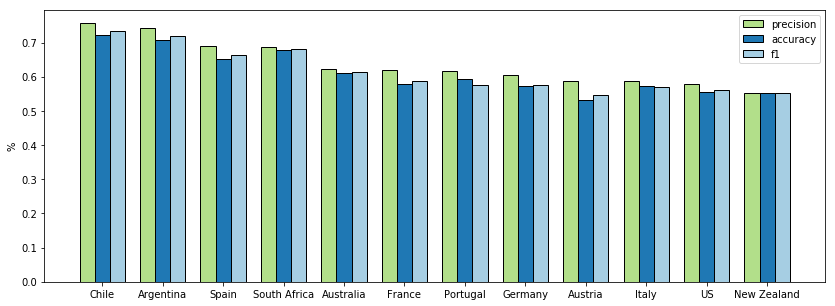

In [26]:
#plot accuracy, precision, f1 for every country (f1=weighted average of precision, recall)
temp = pd.DataFrame()
temp = df.loc[:,["ObjectiveCountry","precision","accuracy","f1"]]
temp = temp.sort_values(["precision","f1","accuracy"],ascending=False)
# width of the bars
barWidth = 0.25
 
# Choose the height of the blue bars
bars1 = temp["precision"]
# Choose the height of the cyan bars
bars2 = temp["accuracy"]

bars3 = temp["f1"]

# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
fig, ax = plt.subplots(figsize = (14, 5))

# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = "#b2df8a", edgecolor = 'black', capsize=7, label='precision')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = '#1f78b4', edgecolor = 'black', capsize=7, label='accuracy')

plt.bar(r3, bars3, width = barWidth, color = "#a6cee3", edgecolor = 'black', capsize=7, label='f1')

xs = temp["ObjectiveCountry"].unique().tolist()
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], xs)
plt.ylabel('%')
plt.legend()
 
# Show graphic
plt.show()


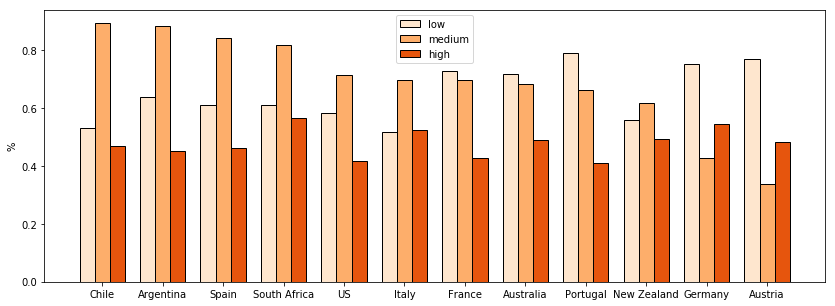

In [27]:

#plot f1 by category predicted 
temp = pd.DataFrame()
temp = df.loc[:,["ObjectiveCountry","low_prec","medium_prec","high_prec"]]
temp = temp.sort_values(["medium_prec","high_prec","low_prec"],ascending=False)
temp

# width of the bars
barWidth = 0.25
 
# Choose the height of the blue bars
bars1 = temp["low_prec"]
# Choose the height of the cyan bars
bars2 = temp["medium_prec"]

bars3 = temp["high_prec"]

# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
fig, ax = plt.subplots(figsize = (14, 5))

# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = "#fee6ce", edgecolor = 'black', capsize=7, label='low')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = '#fdae6b', edgecolor = 'black', capsize=7, label='medium')

plt.bar(r3, bars3, width = barWidth, color = "#e6550d", edgecolor = 'black', capsize=7, label='high')

ys = temp["ObjectiveCountry"].unique().tolist()
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ys)
plt.ylabel('%')
plt.legend()
 
# Show graphic
plt.show()

# Per country, visualize  what influences the decision tree 
IT DOESN'T TAKE INTO ACCOUNT PRICE BECAUSE IT WOULD MAKE EVERY KIND OF VISUALIZATION USELESS

In [28]:
#take mean of all the features used in the computations of decision tree to see the by country and understand which factors play into a country 

features = []
for col in df.columns:
    if col.startswith("feat"):
        features.append(col)
print(features)

t1 = pd.DataFrame()
t = result.groupby("ObjectiveCountry")
for col in features: 
    t1[col] = t[col].mean()
t1.reset_index(inplace=True)
t1

['feat_price', 'feat_region_1', 'feat_variety', 'feat_winery', 'feat_similarityTop3WinesByVariety', 'feat_word_count', 'feat_vintage', 'feat_Alexander Peartree', 'feat_Anna Lee C. Iijima', 'feat_Anne Krebiehl\xa0MW', 'feat_Jim Gordon', 'feat_Joe Czerwinski', 'feat_Kerin O’Keefe', 'feat_Lauren Buzzeo', 'feat_Michael Schachner', 'feat_Paul Gregutt', 'feat_Roger Voss', 'feat_unknown', 'feat_Austria', 'feat_Baden', 'feat_California', 'feat_Kamptal', 'feat_New York', 'feat_Northeastern Italy', 'feat_Northern Spain', 'feat_Washington', 'feat_Österreichischer Sekt']


,ObjectiveCountry,feat_price,feat_region_1,feat_variety,feat_winery,feat_similarityTop3WinesByVariety,feat_word_count,feat_vintage,feat_Alexander Peartree,feat_Anna Lee C. Iijima,...,feat_unknown,feat_Austria,feat_Baden,feat_California,feat_Kamptal,feat_New York,feat_Northeastern Italy,feat_Northern Spain,feat_Washington,feat_Österreichischer Sekt
0,Argentina,0.789961,0.000000,0.000000,0.000079,0.016006,0.136926,0.000590,0.000000,0.000354,...,0.035880,0.000000,0.000000,0.000568,0.000000,0.000024,0.000000,0.000000,0.000329,0.000043
1,Australia,0.796686,0.000000,0.000000,0.000076,0.015367,0.132115,0.002535,0.000000,0.000353,...,0.033762,0.000000,0.000000,0.000066,0.000000,0.000024,0.000000,0.000000,0.000329,0.000047
2,Austria,0.803199,0.000000,0.000000,0.000077,0.016932,0.135612,0.001514,0.000000,0.000362,...,0.028237,0.000000,0.000000,0.000073,0.000000,0.000024,0.000000,0.000000,0.000351,0.000000
3,Chile,0.784899,0.002107,0.000000,0.000000,0.014667,0.142858,0.001982,0.000094,0.000000,...,0.036902,0.000000,0.000000,0.000070,0.000000,0.000025,0.000000,0.000000,0.000142,0.000048
4,France,0.708036,0.001327,0.000118,0.000089,0.026998,0.212873,0.005675,0.000000,0.000409,...,0.033355,0.000000,0.000000,0.000316,0.000000,0.000000,0.000074,0.000092,0.000406,0.000000
5,Germany,0.799124,0.000000,0.000000,0.000000,0.013912,0.136331,0.001393,0.000000,0.000024,...,0.028665,0.000000,0.000000,0.000072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000047
6,Italy,0.787792,0.000000,0.000192,0.000084,0.022238,0.132706,0.003733,0.000101,0.000369,...,0.031649,0.000000,0.000000,0.009333,0.000000,0.000027,0.000000,0.000000,0.000352,0.000094
7,New Zealand,0.797061,0.000000,0.000000,0.000076,0.015627,0.131842,0.001898,0.000000,0.000347,...,0.035223,0.000000,0.000000,0.000073,0.000000,0.000023,0.000000,0.000000,0.000336,0.000046
8,Portugal,0.757384,0.000000,0.000010,0.000000,0.012610,0.177918,0.000468,0.000000,0.000476,...,0.029095,0.000000,0.000000,0.000390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077
9,South Africa,0.795423,0.000000,0.000000,0.000075,0.016121,0.131440,0.001603,0.000000,0.000348,...,0.034527,0.000000,0.000000,0.000556,0.000000,0.000000,0.000000,0.000000,0.000325,0.000046


['feat_winery', 'feat_similarityTop3WinesByVariety', 'feat_word_count', 'feat_vintage', 'feat_Anna Lee C. Iijima', 'feat_Anne Krebiehl\xa0MW', 'feat_Kerin O’Keefe', 'feat_Paul Gregutt', 'feat_Roger Voss', 'feat_unknown', 'feat_California', 'feat_New York', 'feat_Washington', 'feat_Österreichischer Sekt']
[0.8797548977283339, 0.09767680931395678, 0.541386771468829, 0.08177710773742607, 0.25771821244836857, 0.14845875605033798, 0.24430621612729933, 0.500544859185614, 0.9498168473702502, 0.958576480127003, 0.06090383181904845, 0.9116169579763092, 0.8106340735356595, 0.4561525975880225]


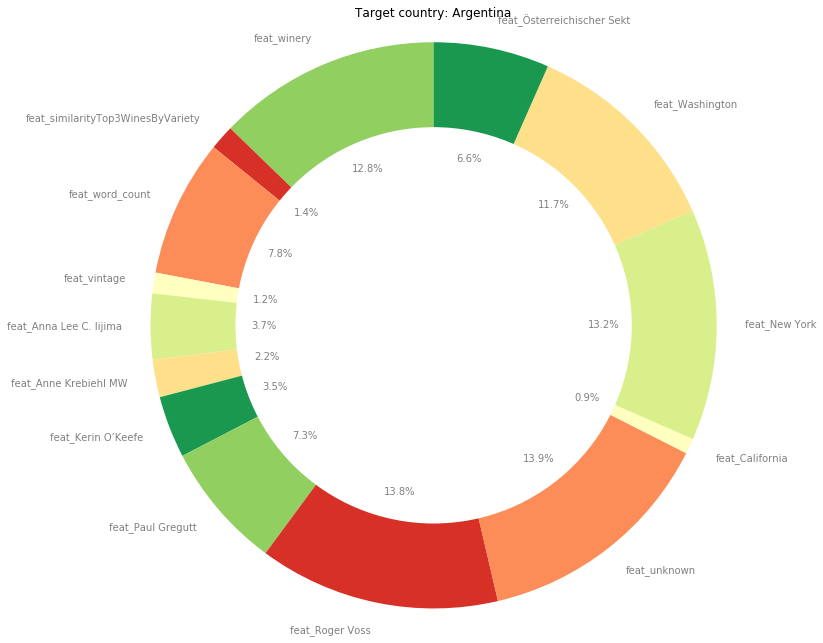

['feat_winery', 'feat_similarityTop3WinesByVariety', 'feat_word_count', 'feat_vintage', 'feat_Anna Lee C. Iijima', 'feat_Anne Krebiehl\xa0MW', 'feat_Kerin O’Keefe', 'feat_Michael Schachner', 'feat_Paul Gregutt', 'feat_Roger Voss', 'feat_unknown', 'feat_California', 'feat_New York', 'feat_Washington', 'feat_Österreichischer Sekt']
[0.8505539283066603, 0.07929666847445416, 0.5123358963491231, 0.4330267483026902, 0.2572264728604512, 0.14114299386286694, 0.19075006563895797, 0.1825526740746673, 0.5063927747265015, 0.9138151867107667, 0.8975582663184156, 0.007036711100141844, 0.8943753244766887, 0.8111775742673301, 0.4975858769597316]


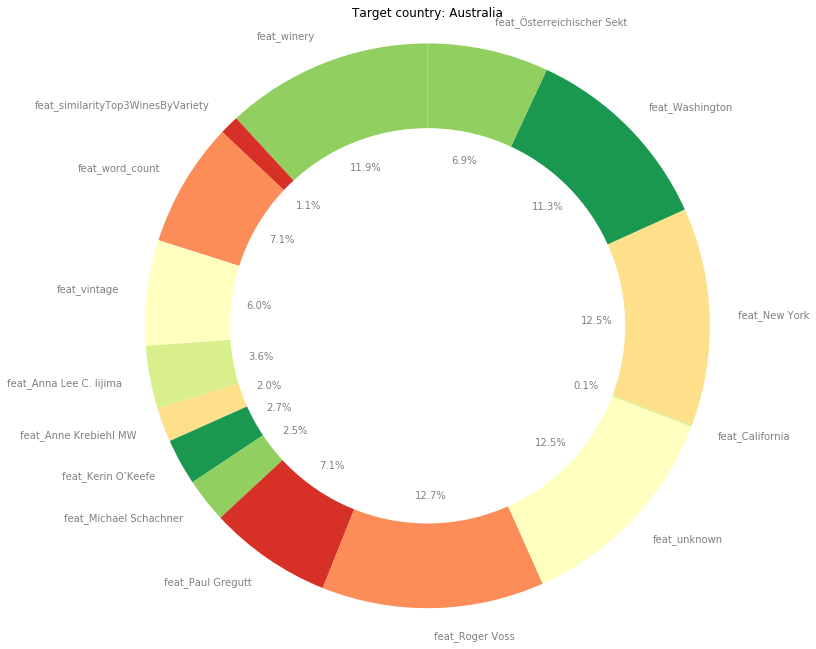

['feat_winery', 'feat_similarityTop3WinesByVariety', 'feat_word_count', 'feat_vintage', 'feat_Anna Lee C. Iijima', 'feat_Kerin O’Keefe', 'feat_Michael Schachner', 'feat_Paul Gregutt', 'feat_Roger Voss', 'feat_unknown', 'feat_California', 'feat_New York', 'feat_Washington']
[0.8612769027859559, 0.12431118953164622, 0.5334527896658803, 0.24854283415890854, 0.2634436080744587, 0.14645555030810264, 0.32177289016959815, 0.5121444950150676, 0.8347877364471737, 0.7383209391146347, 0.007836798725396398, 0.8893405728747442, 0.8632137802622089]


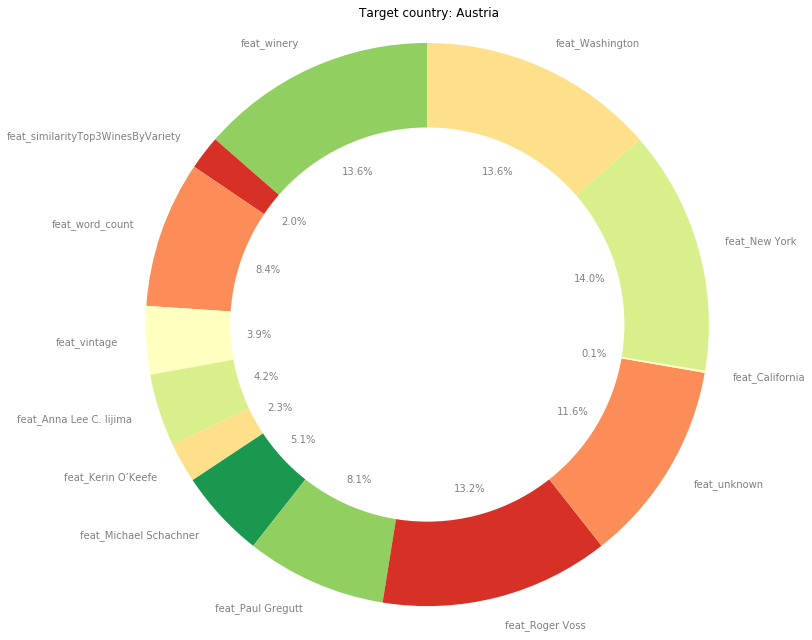

['feat_region_1', 'feat_similarityTop3WinesByVariety', 'feat_word_count', 'feat_vintage', 'feat_Alexander Peartree', 'feat_Anne Krebiehl\xa0MW', 'feat_Jim Gordon', 'feat_Kerin O’Keefe', 'feat_Lauren Buzzeo', 'feat_Paul Gregutt', 'feat_Roger Voss', 'feat_unknown', 'feat_California', 'feat_New York', 'feat_Washington', 'feat_Österreichischer Sekt']
[1.0, 0.059154423942290535, 0.5772036018291642, 0.3332041364867091, 0.9314148348564248, 0.0825589313558545, 1.0, 0.20035549343204975, 1.0, 0.1852295092763145, 0.9283960321239266, 0.98801976797908, 0.007493178914374366, 0.921336342559472, 0.3502561904549731, 0.5145813065789555]


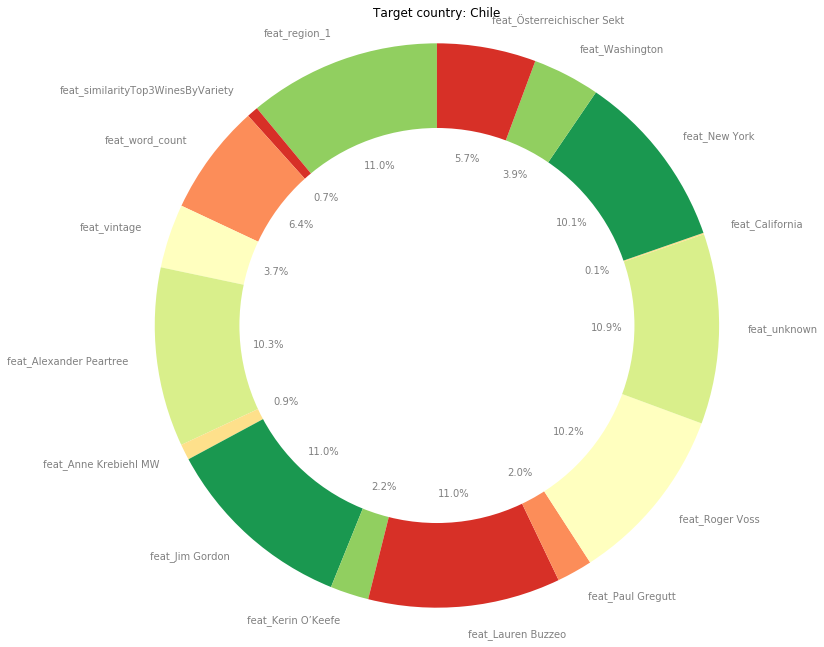

['feat_region_1', 'feat_variety', 'feat_winery', 'feat_similarityTop3WinesByVariety', 'feat_word_count', 'feat_vintage', 'feat_Anna Lee C. Iijima', 'feat_Anne Krebiehl\xa0MW', 'feat_Kerin O’Keefe', 'feat_Michael Schachner', 'feat_Paul Gregutt', 'feat_unknown', 'feat_California', 'feat_Northeastern Italy', 'feat_Northern Spain', 'feat_Washington']
[0.6298900187589057, 0.6162972890283231, 0.9999999999999999, 0.413836749529238, 1.0, 1.0, 0.2975517982537584, 0.1144814283804605, 0.43162757346089686, 0.07715770010033497, 0.5739644827210986, 0.8858201076552557, 0.033830066537312686, 1.0, 1.0, 1.0]


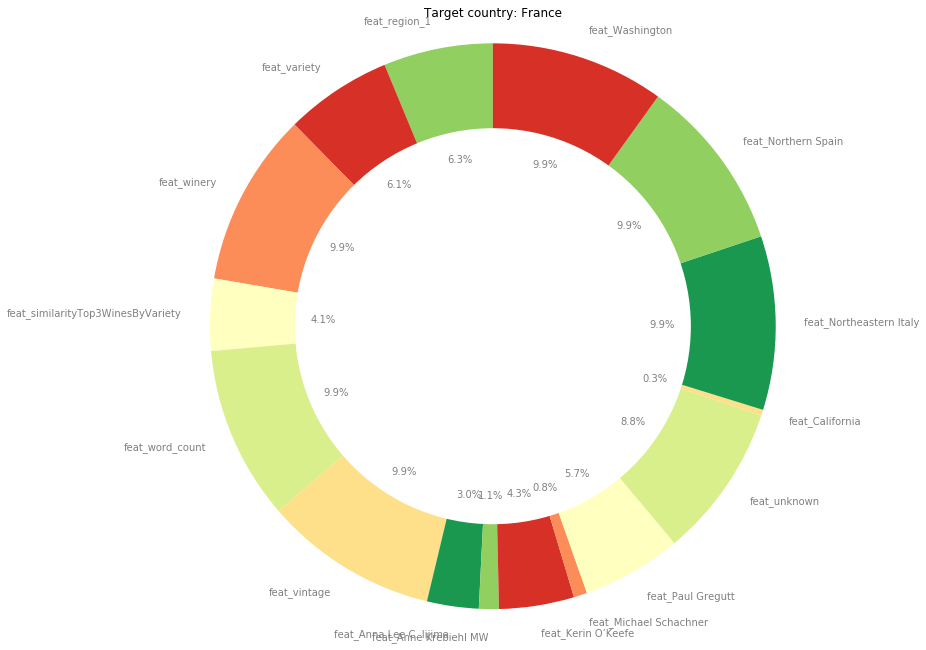

['feat_similarityTop3WinesByVariety', 'feat_word_count', 'feat_vintage', 'feat_Anna Lee C. Iijima', 'feat_Anne Krebiehl\xa0MW', 'feat_Kerin O’Keefe', 'feat_Michael Schachner', 'feat_Paul Gregutt', 'feat_Roger Voss', 'feat_unknown', 'feat_California', 'feat_Österreichischer Sekt']
[0.03745750950255533, 0.5377942389006829, 0.22670541073334916, 0.017255357146568274, 0.22688180538615718, 0.14848646819418676, 0.18173327634601602, 0.9635432853460916, 0.8265782563642903, 0.7506589811479626, 0.007765218066261833, 0.49684561447237335]


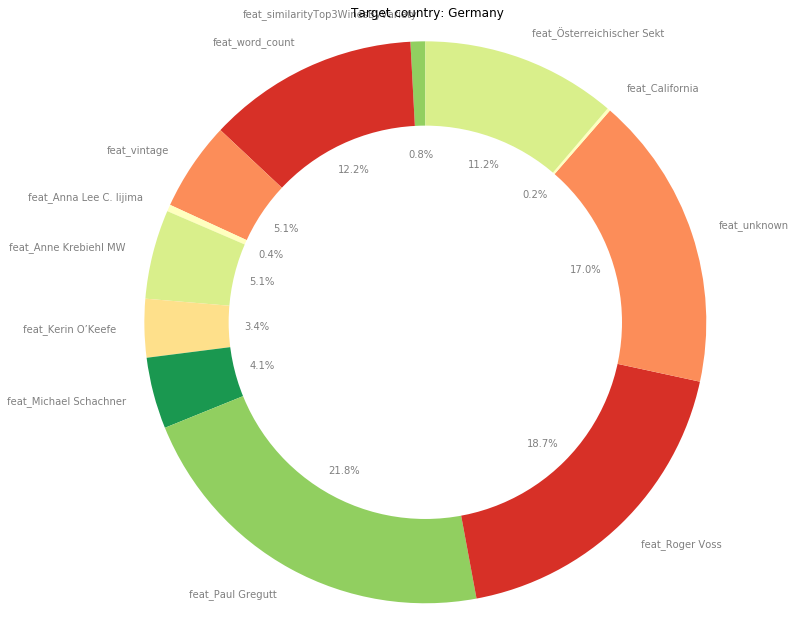

['feat_variety', 'feat_winery', 'feat_similarityTop3WinesByVariety', 'feat_word_count', 'feat_vintage', 'feat_Alexander Peartree', 'feat_Anna Lee C. Iijima', 'feat_Anne Krebiehl\xa0MW', 'feat_Michael Schachner', 'feat_Paul Gregutt', 'feat_Roger Voss', 'feat_unknown', 'feat_California', 'feat_New York', 'feat_Washington', 'feat_Österreichischer Sekt']
[0.9999999999999999, 0.9404991460129164, 0.27692213274600186, 0.5159026735241079, 0.649303243618226, 1.0, 0.26882133963078536, 0.16091667014595779, 1.0, 0.5282080310353438, 0.15729544025163236, 0.8366508661189318, 1.0, 0.9999999999999999, 0.8671094911794376, 1.0]


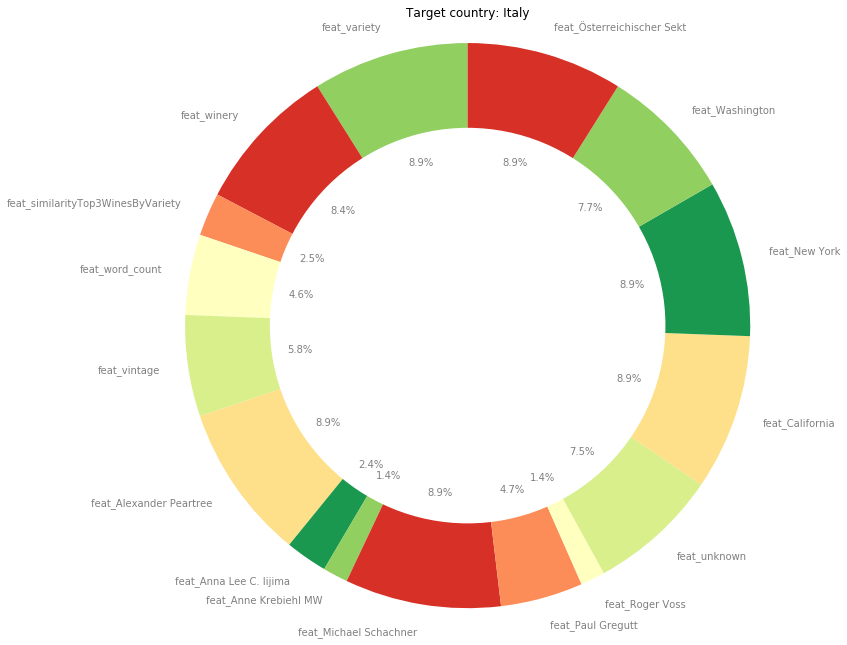

['feat_winery', 'feat_similarityTop3WinesByVariety', 'feat_word_count', 'feat_vintage', 'feat_Anna Lee C. Iijima', 'feat_Anne Krebiehl\xa0MW', 'feat_Kerin O’Keefe', 'feat_Michael Schachner', 'feat_Paul Gregutt', 'feat_Roger Voss', 'feat_unknown', 'feat_California', 'feat_New York', 'feat_Washington', 'feat_Österreichischer Sekt']
[0.8469175079635133, 0.08677858719757875, 0.5106821802404682, 0.3179901222488269, 0.2527839890808949, 0.07866198094515933, 0.17523911163279585, 0.4803472852011583, 0.49425760016575354, 0.8906227181647057, 0.9396416280816299, 0.007801243527620378, 0.8783369062091305, 0.8278514120648751, 0.49005578803476435]


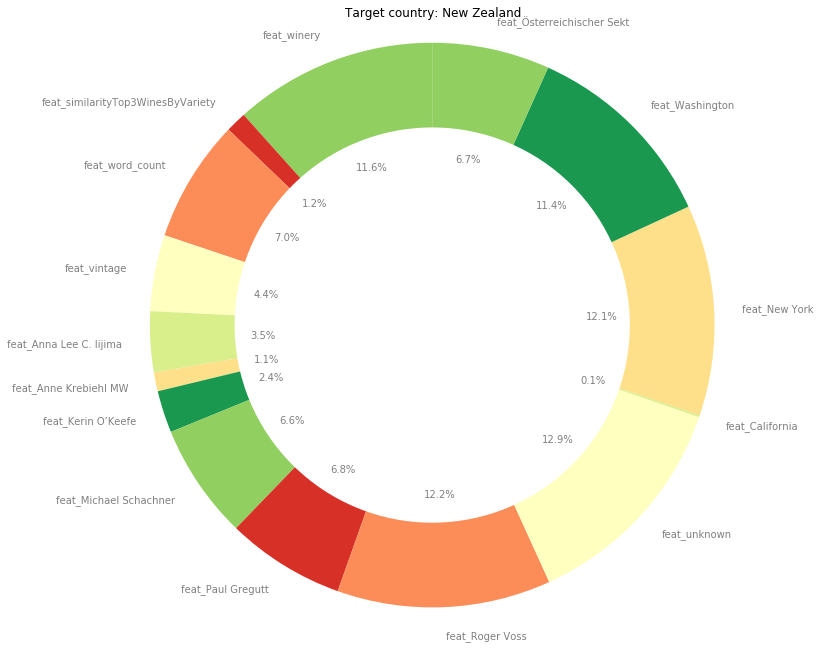

['feat_variety', 'feat_word_count', 'feat_vintage', 'feat_Anna Lee C. Iijima', 'feat_Anne Krebiehl\xa0MW', 'feat_Kerin O’Keefe', 'feat_Michael Schachner', 'feat_Paul Gregutt', 'feat_Roger Voss', 'feat_unknown', 'feat_California', 'feat_Österreichischer Sekt']
[0.050239689738512304, 0.7889231573802724, 0.059786029988233375, 0.3464070140789208, 0.28530110366738404, 0.18796824903010587, 0.3128337224291371, 1.0, 0.685803800896354, 0.7630654511709539, 0.04177389769225629, 0.8132056222753304]


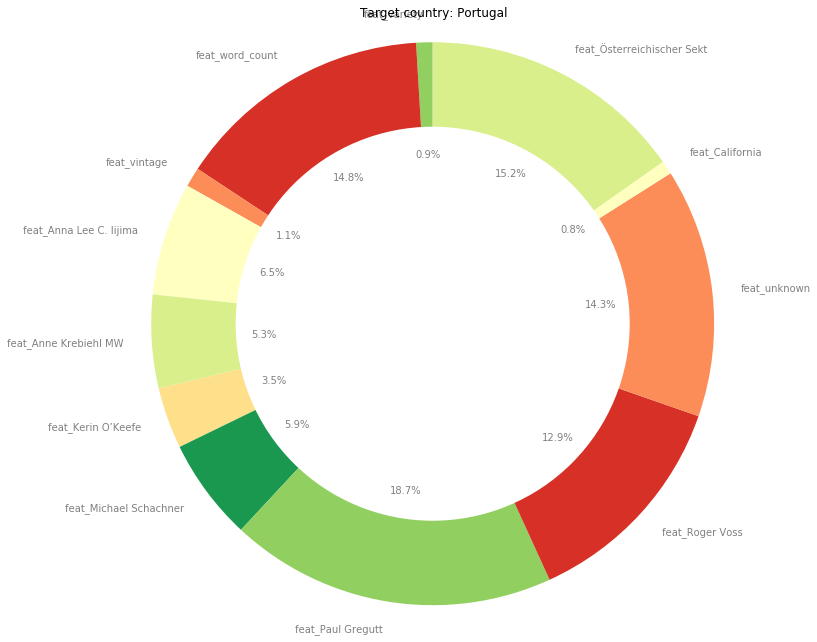

['feat_winery', 'feat_similarityTop3WinesByVariety', 'feat_word_count', 'feat_vintage', 'feat_Anna Lee C. Iijima', 'feat_Anne Krebiehl\xa0MW', 'feat_Kerin O’Keefe', 'feat_Michael Schachner', 'feat_Paul Gregutt', 'feat_Roger Voss', 'feat_unknown', 'feat_California', 'feat_Washington', 'feat_Österreichischer Sekt']
[0.8428075707720042, 0.10097339692496293, 0.5082584965313559, 0.2646742327947555, 0.2534072999639605, 0.07833897493376651, 0.2703808207035507, 0.5093613770673803, 0.4994147404949325, 0.9611881994197591, 0.9195867181707975, 0.05957347235659979, 0.7990630395646291, 0.4930541500711154]


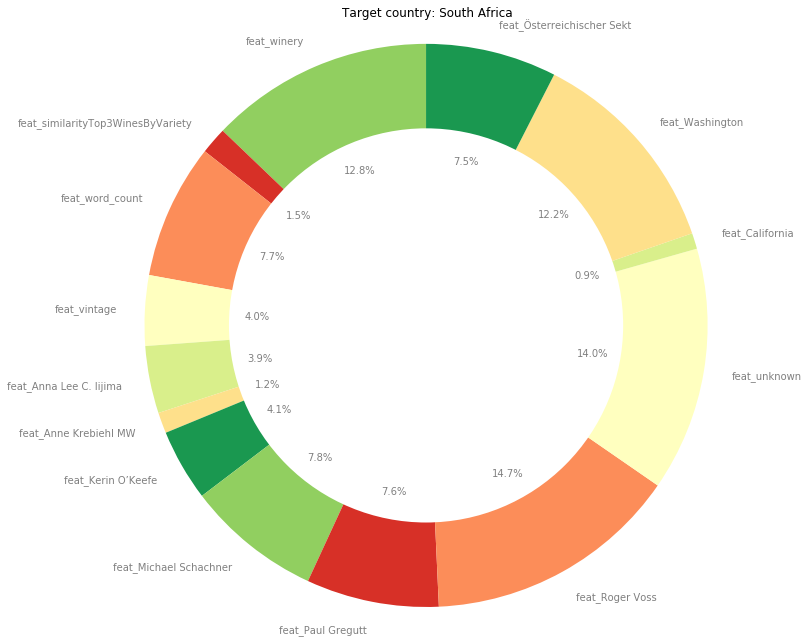

['feat_similarityTop3WinesByVariety', 'feat_word_count', 'feat_vintage', 'feat_Anna Lee C. Iijima', 'feat_Anne Krebiehl\xa0MW', 'feat_Kerin O’Keefe', 'feat_Michael Schachner', 'feat_Paul Gregutt', 'feat_Roger Voss', 'feat_unknown', 'feat_California', 'feat_New York', 'feat_Österreichischer Sekt']
[0.14072305759032433, 0.5432316822184928, 0.272149827689724, 0.4219906578288804, 0.09185843533835279, 0.2893190560119907, 0.5226870968066024, 0.4532343087266502, 1.0, 0.9999999999999999, 0.06453855916438783, 0.9244183986313713, 0.5137511924805538]


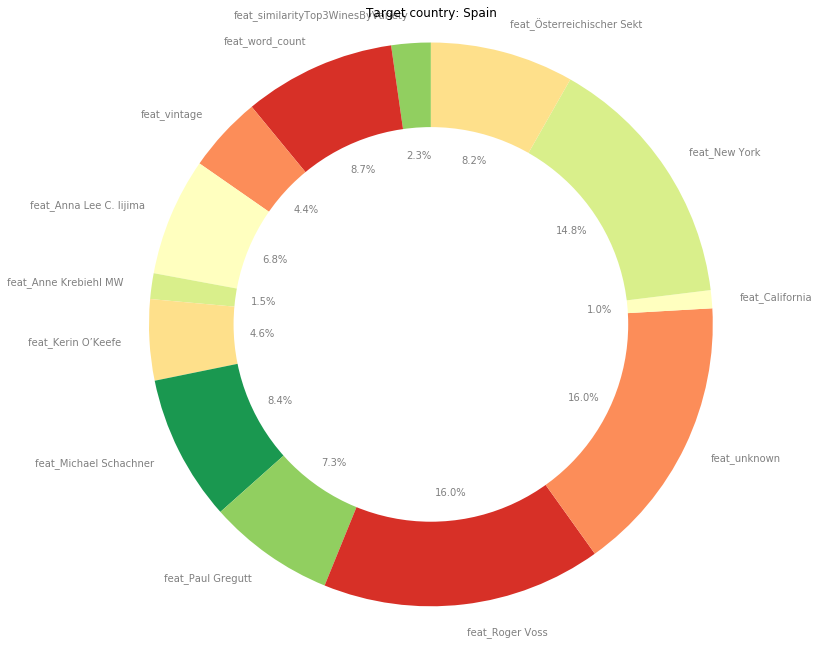

['feat_region_1', 'feat_variety', 'feat_similarityTop3WinesByVariety', 'feat_Anna Lee C. Iijima', 'feat_Anne Krebiehl\xa0MW', 'feat_Joe Czerwinski', 'feat_Kerin O’Keefe', 'feat_Michael Schachner', 'feat_Austria', 'feat_Baden', 'feat_Kamptal']
[0.16932428247783665, 0.5191734785102786, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 0.283865518166963, 1.0, 1.0, 1.0]


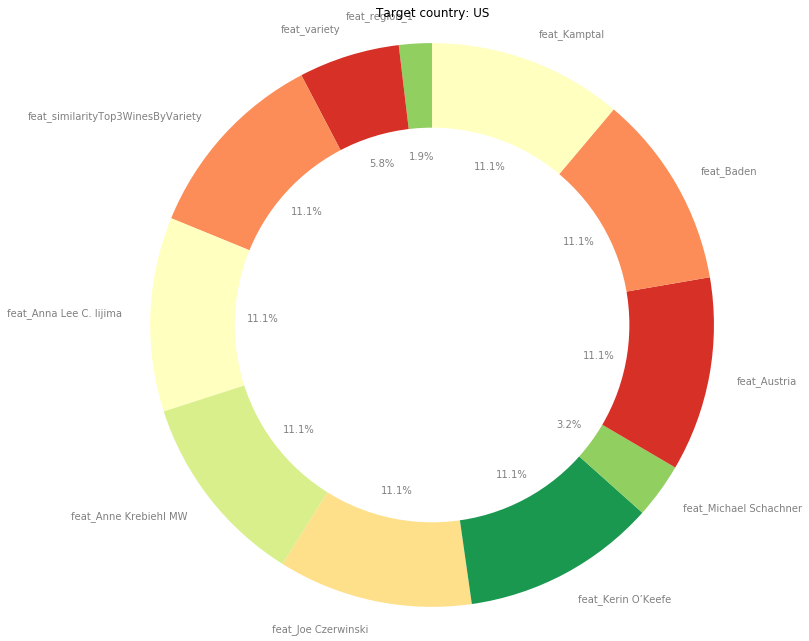

In [34]:
from sklearn import preprocessing

t2 = t1.drop(["ObjectiveCountry"],axis=1)
x = t2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
t3 = pd.DataFrame(x_scaled,columns=t2.columns)



import matplotlib.pyplot as plt

for idx,row in t3.iterrows():
    toPlot = []
    values = []
    for col in t3.columns:
        if row[col] != 0 and col != "ObjectiveCountry" and col != "feat_price":    #ignore price
            toPlot.append(col)
            values.append(row[col])
    print(toPlot)
    print(values)

    fig, ax = plt.subplots(figsize = (9, 9))
    # create data
    names= toPlot  
    size= values
    colors =['#91cf60','#d73027','#fc8d59','#ffffbf','#d9ef8b','#fee08b','#1a9850']

    # Create a circle for the center of the plot
    my_circle=plt.Circle((0,0), 0.70, fc='white')
    plt.title("Target country: "+ t1.iloc[idx]["ObjectiveCountry"])
    patches, texts, autotexts = ax.pie(size, labels=names, autopct='%1.1f%%', startangle=90,colors=colors)
    for text in texts:
        text.set_color('grey')
    for autotext in autotexts:
        autotext.set_color('grey')
    
    ax.axis('equal')  

    plt.tight_layout()
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

In [ ]:
for idx,row in t3.iterrows():
    toPlot = []
    values = []
    for col in t3.columns:
        if row[col] != 0 and col != "ObjectiveCountry" and col != "feat_price":    #ignore price
            toPlot.append(col)
            values.append(row[col])
    print(toPlot)
    print(values)
    # width of the bars
    barWidth = 0.3

    # Choose the height of the blue bars
    bars1 = values

    # The x position of bars
    r1 = np.arange(len(bars1))
    fig, ax = plt.subplots(figsize = (14, 5))

    # Create blue bars
    plt.bar(r1, bars1, width = barWidth, color = "#a6cee3", edgecolor = 'black', capsize=7, label='low')

    ys = toPlot
    # general layout
    plt.xticks([r for r in range(len(bars1))], ys,rotation='vertical')
    plt.title("Target country: "+ t1.iloc[idx]["ObjectiveCountry"])
    plt.ylabel('Feature Importance')
    plt.legend()

    # Show graphic
    plt.show()

# radar chart to compare importances between regression and dectrees?

In [ ]:
df1 = result.head(4)
test = result.iloc[5]
feats = []
values = []

genFeatures = []
for col in result.columns:
    if(col.startswith("feat_")):
            genFeatures.append(col)
print(genFeatures)

for col in result.columns:
    if(col.startswith("feat_")) and (test[col] != 100):
        print(col,test[col])
        feats.append(col)
        values.append(test[col])
df1

In [ ]:
#per il radar chart, va bene probabilmente solo per la comparazione dei risultati delle importanze per linear regression e dectreeclass

#oppure anche per i risultati di precision recall e f1 score?

df = pd.DataFrame()
df = df1[["algorithm"] + genFeatures]
df = df.reset_index(drop=True)
#df.drop(["algorithm"],axis=1,inplace=True)
for col in df.columns:
    df[col] = df[col].replace(100,0)
    if len(df[col].unique().tolist()) == 1 and col != "algorithm":
        df.drop(col,inplace=True,axis=1)
df

In [ ]:
#devi costruire il dataframe 

In [ ]:
def make_spider(row, title):#,# color):
 
    # number of variable
    categories=list(df)[1:]
    #print(categories)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,idx+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.1,0.25,0.50,1], ["0.1","0.25","50","1"], color="grey", size=7)
    plt.ylim(0,1)

    # Ind1
    values=df.loc[idx].drop('algorithm').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1)
    ax.fill(angles, values, alpha=0.4)

    # Add a title
    plt.title(title, size=11, y=1.1)
    
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
#my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for idx,row in df.iterrows():
    make_spider(row,row["algorithm"]) #,my_palette(row))

In [ ]:
df = df[df["feat_winery"] != 0]
df = df.reset_index(drop=True)
print(df)
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('algorithm').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.1,0.25,0.50,1], ["0.1","0.25","0.50","1"], color="grey", size=7)
plt.ylim(0,1)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)



# plots


In [ ]:
#plot scatter plot for visualizing bins by color

In [ ]:
#plot radar plot to visualize most important features for regression

In [ ]:
#plot radar plot for features in dectree

In [ ]:
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))

categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(2,2,row+1, polar=True, )
 
# If you want the first axis to be on top:
ax.set_theta_offset(math.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Ind1
values=df.loc[row].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
ax.fill(angles, values, color=color, alpha=0.4)
 
# Add a title
plt.title(title, size=11, color=color, y=1.1)
 
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))


# CLASSIFIER WITHOUT SPARSE MATRIX

In [ ]:
def decTree(features, depth, data):
    X = data.loc[:,features]
    test_size = 0.30
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    classifier = DecisionTreeClassifier(max_depth=depth)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)  
    acc = accuracy_score(y_test,y_pred)
    weightedPrec = precision_score(y_test,y_pred,average="weighted")

    #get feature importances
    lista = []
    for name, importance in zip(features, classifier.feature_importances_):
        lista.append([name, importance])
    precision,recall,fscore,support = precision_recall_fscore_support(y_test, y_pred,labels=labels)
    print(classification_report(y_test, y_pred, target_names=labels))
    return classifier

In [ ]:
temp = pd.DataFrame()
temp = wine_base
temp.drop("country",inplace=True,axis=1)

In [ ]:
features = temp.columns
depth = 4
clf = decTree(features,depth,temp)

In [ ]:
#show me the tree

##### Graphviz sucks, you need to check if it's installed and it may give you problems anyway, the code below fixed it for me"
#### be sure that you have the package installed
import os
import sys
def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)
import pydotplus 
from sklearn import tree
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features,  
                         class_names=labels,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
conda_fix(graph)
Image(graph.create_png())

# Classifier using sparse matrix

In [ ]:
def sparseMatrixRep(features,depth,data,test_size):
    X = data.loc[:,features+["description"]]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    
    #compute countvectorizer
    vect = CountVectorizer(min_df=5)
    vect.fit(X_train['description'])
    print("vocabulary size: {}".format(len(vect.vocabulary_)))
    X_train_vectored_cv = vect.transform(X_train['description'])
    X_train_final = X_train_vectored_cv
    for feature in features:
        X_train_final = hstack((X_train_final,np.array(X_train[feature])[:,None]))
    
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train_final, y_train)
    
    y_train_pred = clf.predict(X_train_final)
    X_test_final = vect.transform(X_test['description'])
    for feature in features:
        X_test_final = hstack((X_test_final,np.array(X_test[feature])[:,None]))

    y_test_pred = clf.predict(X_test_final)
    print(classification_report(y_test, y_test_pred, target_names=labels))
    
    return clf

In [ ]:
#change the input and compute

features = ["price"] #basic #+ word + tfGroup + word2vec
depth = 3
test_size = 0.30
clf = sparseMatrixRep(features,depth,wine_base,test_size)

In [ ]:
#show me the tree
##### Graphviz sucks, you need to check if it's installed and it may give you problems anyway, the code below fixed it for me"
#### be sure that you have the package installed

import os
import sys
import pydotplus 
from sklearn import tree
from IPython.display import Image  

def conda_fix(graph):
    path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
    paths = ("dot", "twopi", "neato", "circo", "fdp")
    paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
    graph.set_graphviz_executables(paths)
    
dot_data = tree.export_graphviz(clf, out_file=None,   
                             class_names=labels,  
                             filled=True, rounded=True,  
                             special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
conda_fix(graph)
Image(graph.create_png())

# Test with combinations and get results dataframe (no countvect working on this as of now)

In [ ]:
#create a dataframe with every test combination you put
def testToDataFrame(algorithm,combination,Y,allfeats,dataset):
    test_size = 0.30 
    cols = ["algorithm","input","precision","accuracy","depth"]
    for lab in labels:
        cols.append(lab +"_prec")
        cols.append(lab +"_recall")
        cols.append(lab +"_f1")
        cols.append(lab +"_support")
    for el in allfeats: #controlla che allfeats vada bene, amgari fotte con l'ordine
        cols.append("feat_"+el)
    results = pd.DataFrame()
    row = 0
    comb = 0
    for el in combination["args"]: 
        for depth in combination["depth"]:
            row = row + 1
            X = dataset.loc[:,el]
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
            if algorithm == "decTree":
                classifier = DecisionTreeClassifier(max_depth=depth)
            else:
                classifier = RandomForestClassifier(max_depth=depth,n_estimators = estimators)
            classifier.fit(X_train,y_train)
            y_pred = classifier.predict(X_test)  
            acc = accuracy_score(y_test,y_pred)
            weightedPrec = precision_score(y_test,y_pred,average="weighted")        
            data = [algorithm,el,weightedPrec,acc,depth]
            precision,recall,fscore,support = precision_recall_fscore_support(y_test, y_pred)
            for i in range(0,len(labels)):
                data.append(precision[i])
                data.append(recall[i])
                data.append(fscore[i])
                data.append(support[i])
            #for lab in labels:
            
             #   data.append(rep[lab].precision)     #ORDER IS VERY IMPORTANT
              #  data.append(rep[lab].recall)
               # data.append(rep[lab].f1-score)
                #data.append(rep[lab].support)
            temp = {}
            c = zip(el,classifier.feature_importances_)
            counter = 0
            for name,importance in c:
                if importance > 0:
                    temp[name] = importance
                    counter += 1
            data.append(counter)
            for feat in allfeats:
                if feat not in el:
                    data.append(100) #100 is an impossible value not to be taken into account
                else:
                    data.append(temp[feat])
            df2 = pd.DataFrame([data],columns=cols)
            results = results.append(df2,ignore_index=True)
        comb = comb + 1
    return results

In [ ]:
args = [["price"],["price","word_count"],basic,basic+tfGroup, basic+word2vec,basic+word2vec+tfGroup,word2vec,tfGroup,word2vec+tfGroup]
allfeatures = basic + word + word2vec + tfGroup 
decTreeCombinations = {"depth":[2,3,4,5],"args":args}

In [ ]:
res = testToDataFrame("decTree",decTreeCombinations,Y,allfeatures,wine_base)

In [ ]:
res.sort_values(["precision",'depth'],ascending=False)

In [ ]:
res.iloc[19]

In [ ]:
res.iloc[17]